In [21]:
from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
  "bolt://localhost:7687",
  auth=basic_auth("neo4j", "password"))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Direct Bearer shares vs CPI score 


In [4]:
blacklist = pd.read_csv('data/targets.simple.csv')
display(blacklist.head())
c_taxes = pd.read_csv('data/corporate_taxes.csv')
display(c_taxes.head())
centrality_df = pd.read_csv('data/centrality_scores.csv')
display(centrality_df.head())
cpi_df = pd.read_csv('data/cpi2015.csv')
display(cpi_df.head())
final_df = pd.read_csv('data/num_bear_plus_country.csv')
bearer = pd.read_csv('data/bear_shares_per_entity.csv')
bearer

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,first_seen,last_seen
0,arpet-entidades-13,Organization,VALUMAR LLC,NaN,NaN,NaN,NaN,NaN,ARG List - Unidad de Información Financiera - ...,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
1,arpet-personas-10,Person,Hadi Soleimanpour,NaN,1956-01-13;1960-08-24,ir,NaN,0006686;008589;10720,ARG List - UFI AMIA - 2019-07-26,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
2,arpet-personas-11,Person,Alí Fallahijan,NaN,1994,ir,NaN,NaN,ARG List - UFI AMIA - 2019-07-26,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
3,arpet-personas-15,Person,Ahmad Reza Asghari,NaN,1961-06-11,ir,NaN,008664,ARG List - UFI AMIA - 2019-07-26,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
4,arpet-personas-19,Person,hussein mohamed jomma,NaN,NaN,NaN,NaN,NaN,ARG List - U.I.F - 2019-08-09,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38


,Unnamed: 0,Country,Corporate tax (excl. dividend taxes)
0,0,Afghanistan,20.0
1,1,Albania,15.0
2,2,Algeria,26.0
3,3,American Samoa,34.0
4,4,Andorra,10.0


,entity,score
0,ACCELONIC LTD.,64.317563
1,VELA GAS INVESTMENTS LTD.,50.576574
2,Dale Capital Group Limited,29.071236
3,BOB AGENTS LIMITED,21.588562
4,GNG LTD.,19.402875


,Country,CPI score 2015,Sources 2015,Standard error 2015
0,Denmark,91,7.0,2.16
1,New Zealand,91,7.0,2.32
2,Finland,90,7.0,1.77
3,Singapore,85,8.0,2.02
4,Sweden,89,7.0,1.71


,Unnamed: 0,E.name,E.countries,total
0,0,DECARIA COMPANY LTD.,Samoa,2
1,1,DRAGONTLY TELECOMMUNICATIONS INC.,Samoa,15
2,2,FOREVER FAITH FINANCE LTD.,Seychelles,20
3,3,AGAMENON INVESTMENTS LIMITED,Spain,2
4,4,FOXBOURNE LIMITED,Luxembourg,2
...,...,...,...,...
30813,30813,Middlebeers Ltd.,United States,1
30814,30814,Trans Yula Corporation,Panama,1
30815,30815,JAFLC Capital Management Ltd.,United States,1
30816,30816,Brickside Limited,Canada,1


In [20]:
#merged num bear with 
final_df = bearer.merge(c_taxes,left_on='E.countries',right_on='Country')
#sns.scatterplot(x='Corporate tax (excl. dividend taxes)',y='total',data=final_df)
#final_df = final_df.merge(cpi_df, left_on='Country',right_on='Country')
final_df = final_df[['E.name','total','Country','Corporate tax (excl. dividend taxes)']]
final_df.sort_values(by='total')
final_df = final_df.rename(columns = {'E.name':'name','total':'num_bear','Corporate tax (excl. dividend taxes)':'Corporate tax'})
final_df = final_df.merge(centrality_df,left_on = 'name',right_on='entity')
final_df = final_df.rename(columns = {'score':'pagerank_score'})
final_df = final_df.drop(columns = ['entity'])
final_df = final_df.merge(cpi_df,left_on='Country',right_on='Country')
final_df = final_df.drop(columns = ['Sources 2015','Standard error 2015'])
final_df

,name,num_bear,Country,Corporate tax,pagerank_score,CPI score 2015
0,DECARIA COMPANY LTD.,2,Samoa,27.0,0.413582,52
1,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,2.063801,52
2,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,0.151301,52
3,NUKA B.V.,1,Samoa,27.0,0.278801,52
4,NUKA B.V.,1,Samoa,27.0,0.151301,52
...,...,...,...,...,...,...
32278,SUZANNE CORP.,2,India,22.0,0.575000,38
32279,HANSAN CORP.,2,India,22.0,0.447500,38
32280,SAUCHER HOLDING CORPORATION,2,Kenya,30.0,0.787500,25
32281,Flexi-mobile Limited,2,Kenya,30.0,0.298750,25


In [22]:
#final_df.to_csv('data/final_df')

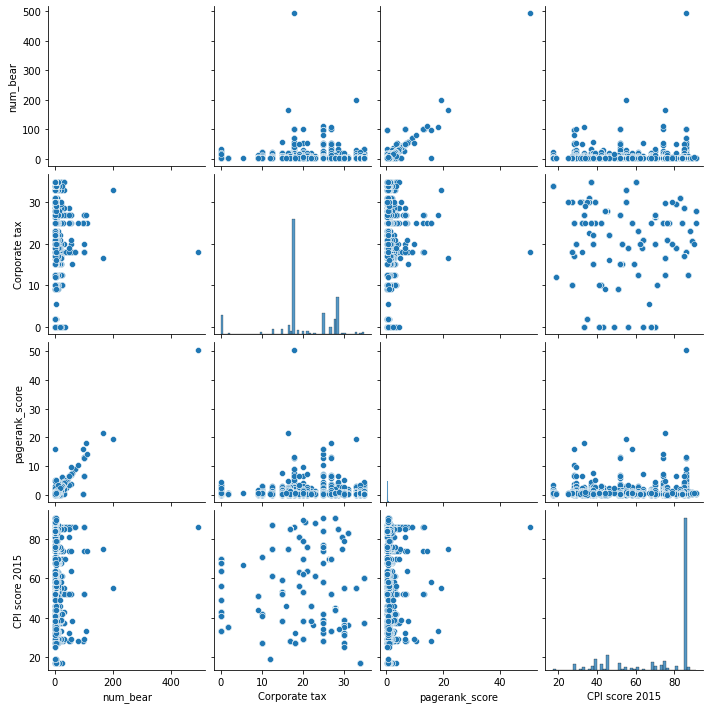

In [21]:
sns.pairplot(final_df)

30818
195


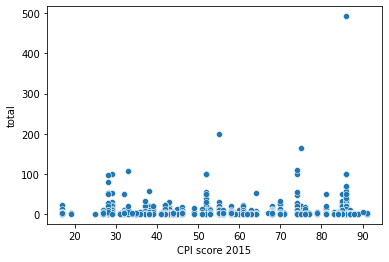

,E.name,E.countries,total,Country,CPI score 2015,Sources 2015,Standard error 2015
0,DECARIA COMPANY LTD.,Samoa,2,Samoa,52,NaN,NaN
1,DRAGONTLY TELECOMMUNICATIONS INC.,Samoa,15,Samoa,52,NaN,NaN
2,NUKA B.V.,Samoa,1,Samoa,52,NaN,NaN
3,PALLISSER & PENDERGAST INC.,Samoa,1,Samoa,52,NaN,NaN
4,LONEY TRADING LTD.,Samoa,2,Samoa,52,NaN,NaN
...,...,...,...,...,...,...,...
30035,SUZANNE CORP.,India,2,India,38,8.0,3.14
30036,HANSAN CORP.,India,2,India,38,8.0,3.14
30037,SAUCHER HOLDING CORPORATION,Kenya,2,Kenya,25,8.0,3.02
30038,Flexi-mobile Limited,Kenya,2,Kenya,25,8.0,3.02


In [23]:
num_bear = pd.read_csv('data/num_bear_plus_country.csv')
cpi = pd.read_csv('data/cpi2015.csv')
centrality = pd.read_csv('data/centrality_scores.csv')
print(num_bear.shape[0])
print(cpi.shape[0])
bear_cpi = num_bear.merge(cpi,left_on='E.countries',right_on='Country')
sns.scatterplot(x='CPI score 2015',y='total',data= bear_cpi)
plt.show()
bear_cpi

Clustering


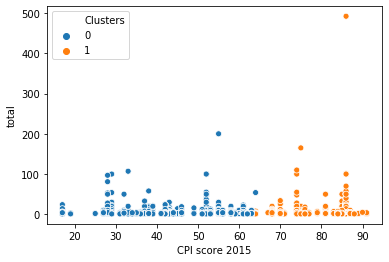

In [3]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(bear_cpi[['total','CPI score 2015']])
bear_cpi['Clusters']=kmeans.labels_
bear_cpi
sns.scatterplot(x='CPI score 2015',y='total',data=bear_cpi,hue='Clusters')

In [2]:
cypher_query = '''
MATCH (a:Officer {name:$name})-[r:officer_of|intermediary_of|registered_address*..10]-(b)
RETURN b.name as name LIMIT 20
'''

with driver.session(database="neo4j") as session:
  results = session.read_transaction(
    lambda tx: tx.run(cypher_query,
                      name="Ross, Jr. - Wilbur Louis").data())
  for record in results:
    print(record['name'])

driver.close()

Transaction failed and will be retried in 1.109834870106722s (Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it))
Transaction failed and will be retried in 1.8620994565393134s (Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it))
Tra

KeyboardInterrupt: 

In [33]:
import requests
import pandas as pd
data_params = {
    'q':'Mossack Fonseca',
    'api_token': 'ysyigAGAdYml7u4idgZ5'
}
result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)
bv = result.json()


Labeling of nodes


In [36]:
def duration_activity(name):
    print(name)
    data_params = {
    'q':name
    }   
    result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)

    bv = result.json()
    print(bv)
    if len(bv['results']['companies']) == 0:
        return None,None
    incorp = bv['results']['companies'][0]['company']['incorporation_date']
    dissolute = bv['results']['companies'][0]['company']['dissolution_date']
    activity = bv['results']['companies'][0]['company']['inactive']
    print(activity)



mossack fonseca
{'api_version': '0.4.8', 'results': {'companies': [{'company': {'name': 'CONIFER RIDGE LIMITED', 'company_number': '02942205', 'jurisdiction_code': 'gb', 'incorporation_date': '1994-06-23', 'dissolution_date': '2020-09-22', 'company_type': 'Private Limited Company', 'registry_url': 'https://beta.companieshouse.gov.uk/company/02942205', 'branch': None, 'branch_status': None, 'inactive': True, 'current_status': 'Dissolved', 'created_at': '2010-10-22T20:03:56+00:00', 'updated_at': '2020-09-23T11:09:39+00:00', 'retrieved_at': '2020-09-23T11:09:37+00:00', 'opencorporates_url': 'https://opencorporates.com/companies/gb/02942205', 'previous_names': [{'company_name': 'OAKWOOD EDGE LIMITED', 'start_date': '2017-12-04', 'end_date': '2018-01-24'}, {'company_name': 'DESERT ROAD LIMITED', 'start_date': '2017-11-21', 'end_date': '2017-12-04'}, {'company_name': 'SYCAMORE LANE LIMITED', 'start_date': '2017-11-07', 'end_date': '2017-11-21'}, {'company_name': 'MOSSACK FONSECA & CO. (U.K.)

In [ ]:
from datetime import datetime

def duration_activity(name):
    print(name)
    data_params = {
    'q':name
    }   
    result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)

    bv = result.json()
    print(bv)
    if len(bv['results']['companies']) == 0:
        return None,None
    incorp = bv['results']['companies'][0]['company']['incorporation_date']
    dissolute = bv['results']['companies'][0]['company']['dissolution_date']
    activity = bv['results']['companies'][0]['company']['inactive']
    if activity == None:
        activity = None
    else:
        activity = bv['results']['companies'][0]['company']['inactive']
        
    if incorp == None or dissolute == None:
          return activity,None 
    else: 
        dt_start = datetime.strptime( incorp, "%Y-%m-%d")
        dt_end = datetime.strptime( dissolute, "%Y-%m-%d")
    duration = dt_end.year-dt_start.year
    return activity,duration 

print(duration_activity('3 DIP S.A'))

3 DIP S.A
{'api_version': '0.4.8', 'results': {'companies': [{'company': {'name': '3 DIP S.A.', 'company_number': '554501', 'jurisdiction_code': 'pa', 'incorporation_date': '2007-02-06', 'dissolution_date': None, 'company_type': 'SOCIEDAD ANONIMA', 'registry_url': 'http://www.registro-publico.gob.pa/consultasweb/api/index.php/ObtenerFolio/1606723/1', 'branch': None, 'branch_status': None, 'inactive': False, 'current_status': 'Suspendido', 'created_at': '2011-06-19T11:21:12+00:00', 'updated_at': '2021-03-19T03:23:59+00:00', 'retrieved_at': '2021-03-19T01:05:48+00:00', 'opencorporates_url': 'https://opencorporates.com/companies/pa/554501', 'previous_names': [], 'source': {'publisher': 'Registro Público de Panamá', 'url': 'http://www.registro-publico.gob.pa/consultasweb/api/index.php/ObtenerFolio/1606723/1', 'retrieved_at': '2021-03-19T01:05:48+00:00'}, 'registered_address': {'street_address': 'PROVINCIA PANAMÁ', 'locality': None, 'region': None, 'postal_code': None, 'country': 'Panama'},

In [ ]:
import pandas as pd
num_bears = pd.read_csv('data/num_bear.csv')
num_bears

,entity,num_bearer
0,VELA GAS INVESTMENTS LTD.,492.0
1,GNG LTD.,200.0
2,BOB AGENTS LIMITED,165.0
3,3 DIP S.A.,110.0
4,INGELSA LTD.,107.0
...,...,...
30693,CHORLEY SERVICES LIMITED,1.0
30694,BEAUVIER LTD.,1.0
30695,ATALAMA S.A.,1.0
30696,TETRA INTERNATIONAL LTD.,1.0


In [9]:
new_df = pd.read_csv('data/num_bear_plus_country')
new_df.groupby('E.countries').count()['total'].sort_values()
print(new_df.shape[0])

hello


In [ ]:
activites = []
durations = []
for i in range (20):
    name= num_bears['entity'].iloc[i]
    values = duration_activity(name)
    activites.append(values[0])
    durations.append(values[1])
  
    

VELA GAS INVESTMENTS LTD.
<Response [200]>
GNG LTD.
<Response [200]>
BOB AGENTS LIMITED
<Response [200]>
3 DIP S.A.
<Response [200]>
INGELSA LTD.
<Response [200]>
ALDEBARAN ASSET MANAGEMENT LTD.
<Response [200]>
AMANZI CORPORATION
<Response [200]>
CAPOMONDO INTERNATIONAL LTD.
<Response [200]>
WINESELECTION S.A.
<Response [200]>
EARLY BIRD LIMITED
<Response [200]>
VS Investments Limited
<Response [200]>
MEGATRONIC SERVICES S.A.
<Response [200]>
NOBLE MOBILE LTD.
<Response [200]>
AZARD SERVICES LTD.
<Response [200]>
LYNX CONSULTANTS INC.
<Response [200]>
KEINES INVESTMENTS LIMITED
<Response [200]>
SUNAIR ELECTRONICS IBEROAMERICA INC.
<Response [200]>
ROKA RWANDA COLUMBO TANTALITE COLTAN III CORP
<Response [200]>
JUMP.COM HOLDING INC.
<Response [200]>
ROKA RWANDA COLUMBO TANTALITE COLTAN II CORP.
<Response [200]>


In [ ]:
activites
durations

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 5,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:

data_params = {
    'q':'VELA GAS INVESTMENTS LTD.'
    }   
result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)
bv = result.json()
bv['results']['companies']

[]

In [ ]:
ex = num_bears[:len(activites)]
ex['duration'] = durations
ex['active'] = activites
ex

ValueError: Length of values (0) does not match length of index (60)